## 8-Queens

Generation  0 :  323  population. Highest fitness:  46 best pop:  [(5, 3), (4, 1), (3, 6), (2, 1), (7, 0), (0, 4), (6, 4), (1, 2)]
Generation  1 :  114  population. Highest fitness:  45 best pop:  [(1, 5), (0, 3), (4, 1), (1, 1), (0, 0), (3, 2), (5, 7), (6, 4)]
Generation  2 :  116  population. Highest fitness:  45 best pop:  [(7, 3), (2, 0), (5, 0), (1, 5), (0, 4), (5, 6), (3, 2), (6, 1)]
Generation  3 :  106  population. Highest fitness:  46 best pop:  [(7, 3), (2, 0), (5, 0), (1, 5), (4, 4), (5, 7), (3, 2), (6, 1)]
Generation  4 :  126  population. Highest fitness:  46 best pop:  [(7, 3), (2, 0), (4, 2), (3, 7), (0, 5), (1, 1), (5, 6), (6, 3)]
Generation  5 :  127  population. Highest fitness:  46 best pop:  [(7, 3), (4, 4), (6, 0), (0, 2), (4, 5), (2, 1), (0, 5), (3, 6)]
Generation  6 :  122  population. Highest fitness:  45 best pop:  [(6, 3), (7, 7), (5, 0), (3, 7), (4, 5), (2, 1), (0, 1), (1, 4)]
Generation  7 :  122  population. Highest fitness:  46 best pop:  [(7, 3), (4, 4), 

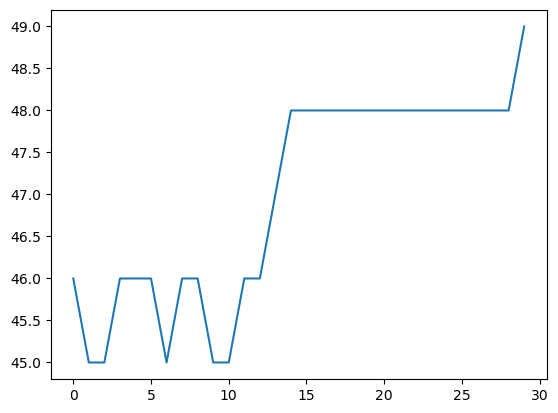

In [ ]:
import random
import matplotlib.pyplot as plt


maxGeneration = 50
tournamentSize = 5
tournamentAmount = 30
mutationChance = 0.05

recording = {}

def generatePop():
    pop = [(random.randint(0,7),random.randint(0,7)) for i in range(8)]
    return pop

def checkIfPopValid(pop):
    seen = set()
    for coord in pop:
        if(coord in seen):
            return False
        seen.add(coord)
    return True

def calculateFitness(pop):
    fitness = 49
    board = [[True for i in range(8)] for j in range(8)]

    for queen in pop:
        #horizontal
        for x in range(8):
            if not board[x][queen[1]]:
                fitness -= 1
        #vertical
        for y in range(8):
            if not board[queen[0]][y]:
                fitness -= 1
        #diagonal
        i = 1
        while(8 > queen[0]+i and 8 > queen[1]+i):
            if not board[queen[0]+i][queen[1]+i]:
                fitness -=1
            i += 1
        i = 1
        while(0 <= queen[0]-i and 8 > queen[1]+i):
            if not board[queen[0]-i][queen[1]+i]:
                fitness -=1
            i += 1
        while(8 > queen[0]+i and 0 <= queen[1]-i):
            if not board[queen[0]+i][queen[1]-i]:
                fitness -=1
            i += 1
        i = 1
        while(0 <= queen[0]-i and 0 <= queen[1]-i):
            if not board[queen[0]-i][queen[1]-i]:
                fitness -=1
            i += 1
        #besetzt markieren
        board[queen[0]][queen[1]] = False
    return fitness

def tournament(contestants):
    highest = contestants[0]
    score = calculateFitness(highest)
    for contestant in contestants:
        if(calculateFitness(contestant) > score):
            highest = contestant
            score = calculateFitness(highest)
    return highest

def mate(parent1, parent2):
    child = []
    for i in range(8):
        if(random.randint(0,1) == 1):
            child.append( parent1[i])
        else:
            child.append( parent2[i])
    return child

def mutate(child):
    new_child = []
    for (x, y) in child:
        if random.random() < mutationChance:
            x += 1 if random.randint(0,1) == 1 else -1
        if random.random() < mutationChance:
            y += 1 if random.randint(0,1) == 1 else -1
        x = max(0, min(7, x))
        y = max(0, min(7, y))

        new_child.append((x, y))
    return new_child
        


startingPop = [generatePop() for i in range(500)]
validPops = []

for pop in startingPop:
    if(checkIfPopValid(pop)):
        validPops.append(pop)
startingPop = validPops

matingPool=[]

solution = []

for generation in range(maxGeneration):

    #check if starting pop is too small
    if(len(startingPop) < 2):
        print("startingPop too small")
        break

    #analize generation
    solved = False
    highest = calculateFitness(startingPop[0])
    highestPop = startingPop[0]
    for i in startingPop:
        if(calculateFitness(i) > highest):
            highest = calculateFitness(i)
            highestPop = i
        if(calculateFitness(i) >= 49):
            print("Problem solved: ", i)
            solved = True
    
    recording[generation] = highest
    if(solved):
        break
    else:
        print("Generation ", generation, ": ", len(startingPop), " population. Highest fitness: ", highest, "best pop: ", highestPop)

    #do tournaments
    matingPool = []
    for j in range(tournamentAmount):
        contestants = []
        for i in range(tournamentSize):
            contestants.append(random.choice(startingPop))
            matingPool.append(tournament(contestants))
    
    #mating & mutation
    matingAmount = tournamentSize * tournamentAmount

    startingPop = []
    for i in range(matingAmount):
        newChild = mutate(mate(random.choice(matingPool), random.choice(matingPool)))
        if(checkIfPopValid(newChild)):
            startingPop.append(newChild)

print(recording)

generations = list(recording.keys())
fitness = list(recording.values())

plt.plot(generations, fitness)
plt.show()




In [64]:
def mutate(child):
    new_child = []
    for (x, y) in child:
        # mutate x
        if random.random() < 0.05:
            x += 1 if random.randint(0,1) == 1 else -1
        # mutate y
        if random.random() < 0.05:
            y += 1 if random.randint(0,1) == 1 else -1

        # Grenzen absichern (0–7)
        x = max(0, min(7, x))
        y = max(0, min(7, y))

        new_child.append((x, y))
    return new_child
        

for i in range(100):
    child = [(7, 5), (3, 4), (4, 1), (4, 2), (4, 1), (0, 3), (6, 4), (4, 5)]
    child = mutate(child)
print(child)

[(7, 5), (3, 4), (4, 1), (4, 2), (4, 1), (0, 2), (6, 4), (4, 5)]
